In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src/')

In [39]:
from data.create_dataset import *
from visualization.visualize import *
from modelling import ols,ridge
from model_evaluation.metrics import *
from processing.data_preprocessing import *
import numpy as np

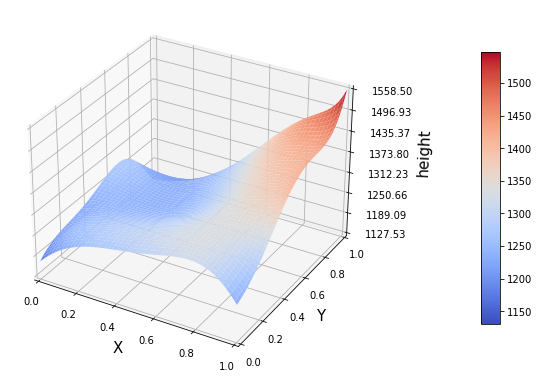

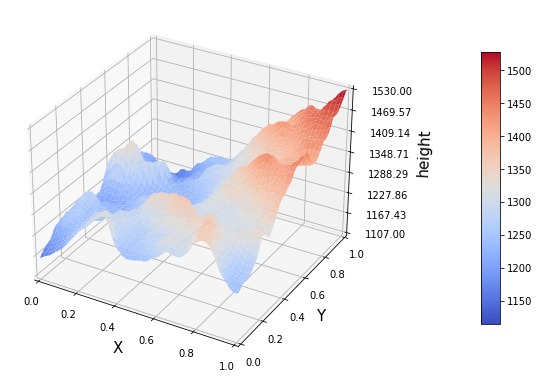

In [25]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=10)
lmb = 0.01
z_ridge = ridge.fit_predict(X,z,X,lmb)
surf = plot_surf_from_X(X,z_ridge)
surf2 = plot_surf_from_X(X,z)

In [28]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=10)
lmb = 0.01
beta_ridge = ridge.fit_beta(X,z,lmb)

In [29]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=lmb).fit(X,z)
np.column_stack((rid.coef_.T,beta_ridge))

array([[    0.        ,  1172.65881983],
       [  600.32516825,   600.32516825],
       [  412.59155554,   412.59155554],
       [-1171.7070669 , -1171.70706689],
       [ -697.10478091,  -697.10478091],
       [-1421.68620826, -1421.68620825],
       [  592.12308057,   592.12308055],
       [ 1061.57251631,  1061.57251635],
       [-1431.66700559, -1431.66700562],
       [ 2014.4400629 ,  2014.4400629 ],
       [  646.09361294,   646.09361298],
       [  330.2944542 ,   330.29445411],
       [ 1046.69365345,  1046.69365347],
       [  152.47297374,   152.47297375],
       [  552.22454598,   552.22454596],
       [  110.54803212,   110.54803213],
       [ -676.53324569,  -676.53324566],
       [ 1234.35753336,  1234.35753341],
       [  143.83770521,   143.83770517],
       [  486.22279969,   486.22279971],
       [-1184.65694506, -1184.65694501],
       [ -322.96596298,  -322.96596301],
       [ -878.99820555,  -878.99820555],
       [  880.18736785,   880.18736791],
       [ -416.79

In [31]:
rid.intercept_

array([1172.65881983])

Must explore now how the centering affects output. Since Sklearn does it automatically, must ensure that the output is on correct scale as well. However, intuitively is should, since we're adding back the intercept that we simply pulled out. But we did center the design matrix as well. Why is that also happening by default in Ridge? I guess it's simply because it's better that way. Also, should explore what happens if one pre scales the data.

In [36]:
from sklearn.model_selection import  train_test_split
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=10)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
lmb = 0.01

beta_ridge = ridge.fit_beta(X_train,z_train,lmb)

z_pred = ridge.predict(X_test,beta_ridge)

In [41]:
MSE(z_test, z_pred)

426.0273414643817

In [42]:
MSE(z_test,z_pred_sk)

426.0273414646002